# 1.Data Cleaning

In [362]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re

In [363]:
df_origin_test= pd.read_csv('data/test_set.csv', index_col=0) #把ID作为索引
df_origin_train = pd.read_csv('data/train_set.csv', index_col=0)

df_tr = df_origin_train.copy()
df_te = df_origin_test.copy()

In [364]:
df = pd.concat([df_tr, df_te], ignore_index=False)
df.shape

(100000, 27)

In [365]:
df.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
84094,23943,5,Leonoray,18.0,84355102.0,Journalist,70260.20,5564.016667,9.0,7.0,...,Bad,2228.79,25.308445,217.0,Yes,246.378645,99.939577,Low_spent_Small_value_payments,78.800397,Poor
46702,29066,5,Osamua,21.0,981149909.0,Teacher,18001.59,1258.132500,7.0,9.0,...,Bad,2225.58,32.088726,240.0,NM,24.986447,45.523998,Low_spent_Small_value_payments,343.581411,Poor
147514,8183,5,Benf,47.0,324295086.0,Developer,9824.31,707.692500,7.0,4.0,...,Standard,1233.96,25.500503,227.0,No,0.000000,22.006889,Low_spent_Medium_value_payments,322.170689,Good
16675,27938,2,Matt Falloonm,41.0,564682345.0,Entrepreneur,87481.62,7022.135000,0.0,4.0,...,Good,214.43,38.505066,282.0,No,55.653369,56.550721,High_spent_Medium_value_payments,726.849284,Standard
84080,38740,3,Seetharamank,53.0,228116416.0,Manager,129204.92,10508.076667,5.0,6.0,...,Standard,1075.37,38.359175,289.0,Yes,277.610885,165.019535,High_spent_Large_value_payments,742.018547,Standard


In [366]:
#relative clean data
df.isna().sum()

Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                30000
dtype: int64

Drop unuseful colomns

In [367]:
# Drop the Columns we not use in model
df.drop(columns=['Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)

In [368]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 84094 to 105046
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Occupation             100000 non-null  object
 1   Type_of_Loan           100000 non-null  object
 2   Credit_Mix             100000 non-null  object
 3   Payment_of_Min_Amount  100000 non-null  object
 4   Payment_Behaviour      100000 non-null  object
 5   Credit_Score           70000 non-null   object
dtypes: object(6)
memory usage: 5.3+ MB


Normalization

In [369]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df[col_float]:
  df[i] = scaler.fit_transform(df[[i]])
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
84094,0.095238,Journalist,0.365671,5564.016667,9.0,7.0,20.0,5.0,"payday loan,mortgage loan,student loan,not spe...",0.967742,...,Bad,0.445905,25.308445,0.535980,Yes,0.138485,99.939577,Low_spent_Small_value_payments,0.066552,Poor
46702,0.166667,Teacher,0.063566,1258.132500,7.0,9.0,31.0,2.0,"credit-builder loan,mortgage loan",0.322581,...,Bad,0.445262,32.088726,0.593052,NM,0.014044,45.523998,Low_spent_Small_value_payments,0.290199,Poor
147514,0.785714,Developer,0.016293,707.692500,7.0,4.0,17.0,0.0,No Data,0.387097,...,Standard,0.246853,25.500503,0.560794,No,0.000000,22.006889,Low_spent_Medium_value_payments,0.272115,Good
16675,0.642857,Entrepreneur,0.465228,7022.135000,0.0,4.0,3.0,1.0,credit-builder loan,0.225806,...,Good,0.042859,38.505066,0.697270,No,0.031282,56.550721,High_spent_Medium_value_payments,0.613926,Standard
84080,0.928571,Manager,0.706429,10508.076667,5.0,6.0,12.0,4.0,"personal loan,credit-builder loan,auto loan,pa...",0.129032,...,Standard,0.215121,38.359175,0.714640,Yes,0.156040,165.019535,High_spent_Large_value_payments,0.626739,Standard


Handing object features

In [370]:
#非数值列名
object_col = df.describe(include='O').columns
object_col

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [371]:
#Payment_Behaviour
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1.0')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2.0')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3.0')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4.0')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5.0')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6.0')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(float)

In [372]:
#Credit_Score & Payment_of_Min_Amount
'''df['Credit_Score'] = df['Credit_Score'].str.replace('Good', '2', n=-1)
df['Credit_Score'] = df['Credit_Score'].str.replace('Standard', '1', n=-1)
df['Credit_Score'] = df['Credit_Score'].str.replace('Poor', '0', n=-1)
df['Credit_Score'] = df[['Credit_Score']].apply(pd.to_numeric)'''

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('NM', '0.0')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('Yes', '1.0')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('No', '2.0')
df['Payment_of_Min_Amount'] = df[['Payment_of_Min_Amount']].apply(pd.to_numeric)


In [373]:
### Balancing - Occupation
occupation_count = df['Occupation'].value_counts(dropna = False)
occupation_count

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [374]:
# Credit_Mix
df['Credit_Mix'].value_counts()
m = {"Bad":0.0, "Standard":1.0, "Good":2.0}
df['Credit_Mix'] = df['Credit_Mix'].map(m)

In [375]:
df.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Score,70000,3,Standard,37080


In [376]:
## Rebuild Type of loans Columns 
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']



In [377]:
df = pd.get_dummies(df, prefix='Occupation', columns=['Occupation'])


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 84094 to 105046
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Annual_Income             100000 non-null  float64
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

# 2.Data Preprocessing

In [379]:
#把训练集和测试集分开
# Separate the training set where 'Credit_Score' is not null
df_train = df[df['Credit_Score'].notna()]

# Separate the test set where 'Credit_Score' is null
df_test = df[df['Credit_Score'].isna()]

# Feature to predict
label_to_predict = 'Credit_Score'

In [380]:
df_train["Credit_Score"].value_counts(normalize=True).sort_index()

Credit_Score
Good        0.178871
Poor        0.291414
Standard    0.529714
Name: proportion, dtype: float64

In [381]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train[label_to_predict]).astype(int)

In [382]:
y_train

array([1, 1, 0, ..., 2, 2, 1])

In [383]:
X      = df_train.drop(columns="Credit_Score")
y      = df_train['Credit_Score']
X_test = df_test

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, 

((56000, 43), (56000,), (14000, 43), (14000,), (30000, 44))

In [384]:
from sklearn.preprocessing import LabelEncoder

le      = LabelEncoder()
print(np.unique(y_train))
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)

pd.DataFrame(y_train).value_counts().sort_index()

['Good' 'Poor' 'Standard']


0     9975
1    16287
2    29738
Name: count, dtype: int64

In [385]:
# our focus group
le.inverse_transform([1])

array(['Poor'], dtype=object)

In [386]:
from sklearn.metrics import confusion_matrix, classification_report 

def eval(model, X_train, X_val, y_train=y_train, y_val=y_val):
    print('TEST')
    y_val_pred = model.predict(X_val)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    print("-------------------------------------------------------")
    print('TRAIN')
    y_train_pred = model.predict(X_train)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Model Evaluation function

In [387]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import make_scorer

# for multi-class
scoring = {
    'precision': make_scorer(precision_score, average=None, labels=[1]),
    'recall'   : make_scorer(recall_score, average=None, labels=[1]),
    'f1'       : make_scorer(f1_score, average=None, labels=[1]),
    'accuracy' : make_scorer(accuracy_score),
} 
# Identify people with low credit scores
# recall_1    = make_scorer(recall_score, average = None, labels=[1])
scoring['recall'] 
# log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

make_scorer(recall_score, average=None, labels=[1])

In [388]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 1.871345029239766, 1: 1.1461083481713432, 2: 0.6277041719909431}

In [389]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.unique(sample_weight)

array([1.87134503, 1.14610835, 0.62770417])

In [390]:
from collections import Counter

counter = Counter(y_train)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/count for class_id, count in counter.items()}  
class_weights

{0: 2.98125313283208, 1: 1.825873395959968, 2: 1.0}

In [391]:
pd.value_counts(y_train, normalize=True).sort_index()

0    0.178125
1    0.290839
2    0.531036
Name: proportion, dtype: float64

In [392]:
# Step 1: Compute normalized class proportions
class_proportions = pd.value_counts(y_train, normalize=True)

# Step 2: Determine maximum class proportion
max_proportion = class_proportions.max()

# Step 3: Calculate class weights
class_weights = max_proportion / class_proportions
class_weights 

2    1.000000
1    1.825873
0    2.981253
Name: proportion, dtype: float64

# Model Comparison

## 1.Logistic Regression

In [393]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    class_weight = "balanced",
    random_state = 42,
    max_iter     = 10000
)

In [394]:
%%time
log_reg.fit(X_train, y_train)

CPU times: user 3min 6s, sys: 21.2 s, total: 3min 28s
Wall time: 54.4 s


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [395]:
print("LOG MODEL")
eval(log_reg, X_train, X_val)

LOG MODEL
TEST
[[2109   84  353]
 [ 677 2814  621]
 [1488 1756 4098]]
              precision    recall  f1-score   support

           0       0.49      0.83      0.62      2546
           1       0.60      0.68      0.64      4112
           2       0.81      0.56      0.66      7342

    accuracy                           0.64     14000
   macro avg       0.64      0.69      0.64     14000
weighted avg       0.69      0.64      0.65     14000

-------------------------------------------------------
TRAIN
[[ 8312   341  1322]
 [ 2718 11132  2437]
 [ 5934  7183 16621]]
              precision    recall  f1-score   support

           0       0.49      0.83      0.62      9975
           1       0.60      0.68      0.64     16287
           2       0.82      0.56      0.66     29738

    accuracy                           0.64     56000
   macro avg       0.63      0.69      0.64     56000
weighted avg       0.69      0.64      0.65     56000



In [396]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = LogisticRegression(   
    class_weight = "balanced",
    random_state = 42,
    max_iter     = 10000
)
param_grid = {
    "penalty"     : ["l1", "l2"],
    "C"           : np.linspace(0.01, 1, 2).round(3),
    "class_weight": ["balanced"],
    "solver"      : ["saga", "liblinear"]
}
grid_model_log = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring = scoring['recall'],
    error_score="raise",
    n_jobs=-1,
    cv=5
) 

%%time
grid_model_log.fit(X_train, y_train)

# Get the best hyperparameters
best_paramsl_log = grid_model_log.best_params_

best_paramsl_log, grid_model_log.best_score_

print("GRID LOG MODEL BALANCED")
eval(grid_model_log, X_train, X_val)

### 2.Random forest classifier

In [397]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=42
)

In [398]:
%%time
rfc.fit(X_train, y_train)

CPU times: user 18.2 s, sys: 328 ms, total: 18.5 s
Wall time: 18.9 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [399]:
print("RF MODEL")
eval(rfc, X_train, X_val)

RF MODEL
TEST
[[1904    5  637]
 [  17 3383  712]
 [ 523  826 5993]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      2546
           1       0.80      0.82      0.81      4112
           2       0.82      0.82      0.82      7342

    accuracy                           0.81     14000
   macro avg       0.80      0.80      0.80     14000
weighted avg       0.81      0.81      0.81     14000

-------------------------------------------------------
TRAIN
[[ 9975     0     0]
 [    0 16286     1]
 [    0     1 29737]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9975
           1       1.00      1.00      1.00     16287
           2       1.00      1.00      1.00     29738

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000



### 03.Xgboost Classifier

In [400]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=42,
)

In [401]:
%%time
xgb.fit(X_train, y_train, 
    sample_weight=sample_weight
)
# weight parameter in XGBoost is per instance not per class.

CPU times: user 12.1 s, sys: 748 ms, total: 12.8 s
Wall time: 1.96 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [402]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=42
)
param_grid = {
    'n_estimators' : [100],
    'learning_rate': np.linspace(0.01, 0.3, 2).round(3),
    'max_depth'    : [5, 6],   
#     'reg_alpha'    : [0, 0.5, 1],  
#     'reg_lambda'   : [0, 0.5, 1], 
}
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = scoring['recall'], # 'neg_log_loss'      
    error_score='raise',     
    n_jobs = -1,
#     refit=True,
    cv=5,
)

In [403]:
%%time
grid_model_xgb.fit(X_train, y_train, 
    sample_weight=sample_weight
)

CPU times: user 12.2 s, sys: 1.13 s, total: 13.3 s
Wall time: 24 s


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.3 ]),
                         'max_depth': [5, 6], 'n_estimators': [100]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [404]:
# Get the best hyperparameters
best_params_xgb = grid_model_xgb.best_params_

best_params_xgb, grid_model_xgb.best_score_

({'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100},
 0.8210227280223565)

In [405]:
print("GRID XGB MODEL BALANCED")
eval(grid_model_xgb, X_train, X_val)

GRID XGB MODEL BALANCED
TEST
[[2198   29  319]
 [ 249 3404  459]
 [1155 1173 5014]]
              precision    recall  f1-score   support

           0       0.61      0.86      0.72      2546
           1       0.74      0.83      0.78      4112
           2       0.87      0.68      0.76      7342

    accuracy                           0.76     14000
   macro avg       0.74      0.79      0.75     14000
weighted avg       0.78      0.76      0.76     14000

-------------------------------------------------------
TRAIN
[[ 9381    18   576]
 [  530 14630  1127]
 [ 3837  4048 21853]]
              precision    recall  f1-score   support

           0       0.68      0.94      0.79      9975
           1       0.78      0.90      0.84     16287
           2       0.93      0.73      0.82     29738

    accuracy                           0.82     56000
   macro avg       0.80      0.86      0.82     56000
weighted avg       0.84      0.82      0.82     56000



Comparison

In [406]:
# xgb_model has best scorer default parameters
X_val.columns.shape, xgb.feature_importances_.shape

((43,), (43,))

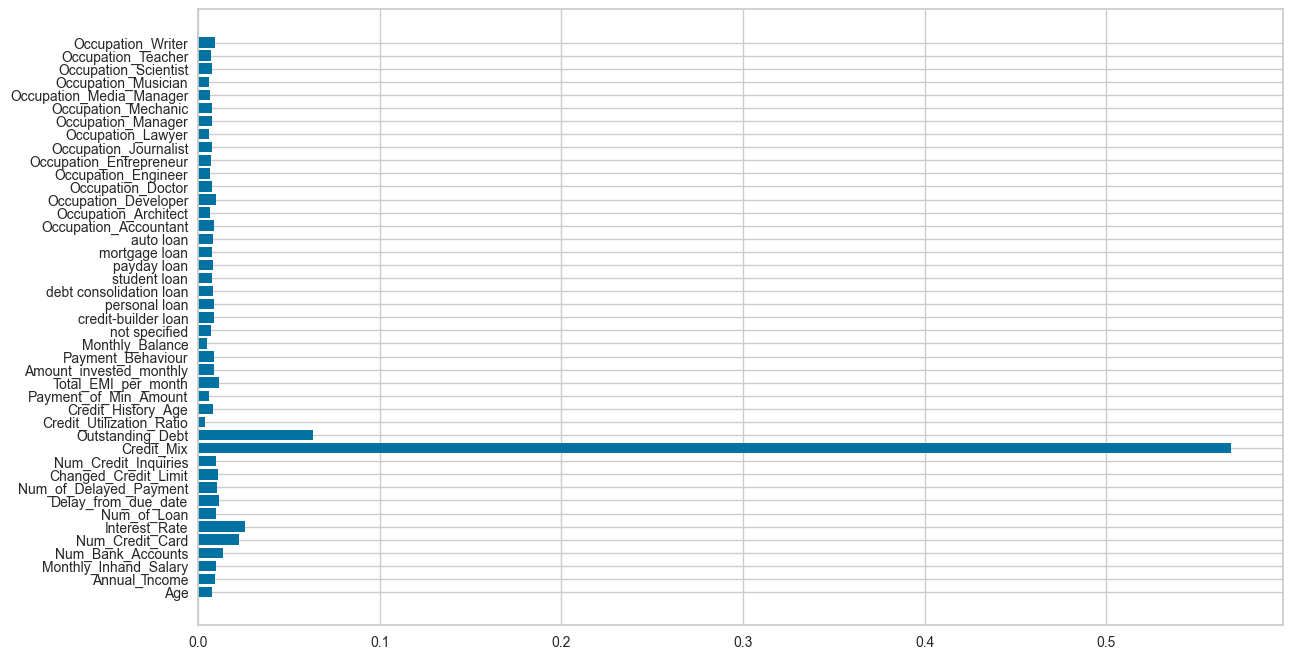

In [407]:
plt.figure(figsize=(14,8))
plt.barh(X_val.columns, xgb.feature_importances_);

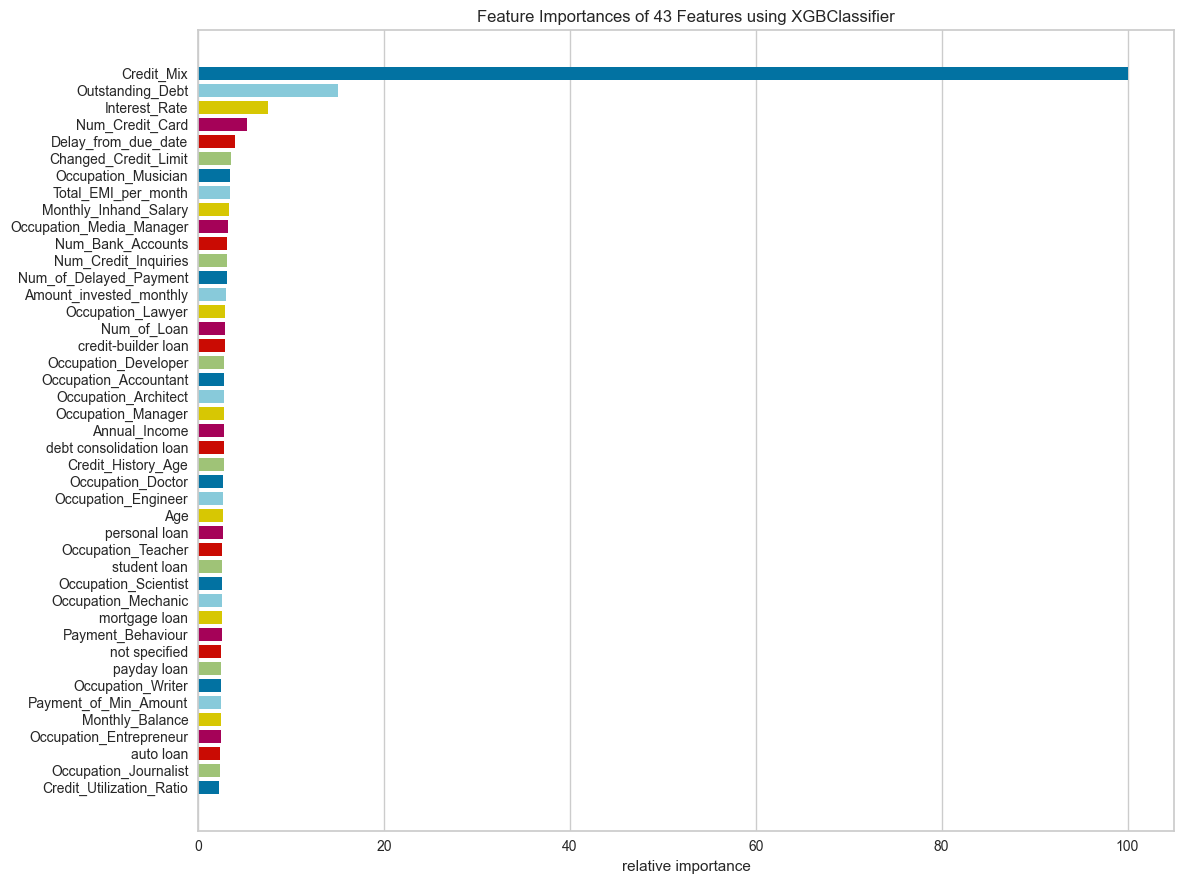

In [408]:
from yellowbrick.model_selection import feature_importances, FeatureImportances

model = XGBClassifier(
    random_state=42, 
    **best_params_xgb
)

plt.subplots(figsize=(12, 9))
# Use the quick method and immediately show the figure
feature_importances(model, X_val, y_val);

Permutation Based Feature Importance

In [409]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb, X_val, y_val)
perm_importance['importances_mean']

array([ 9.72857143e-03,  1.42142857e-02,  2.07714286e-02,  1.40857143e-02,
        1.26428571e-02,  8.15000000e-02,  2.90000000e-03,  4.85142857e-02,
        1.52428571e-02,  3.07000000e-02,  1.48714286e-02,  1.42314286e-01,
        7.13285714e-02,  2.71428571e-04,  2.44142857e-02,  1.18571429e-03,
        3.46142857e-02,  1.80000000e-02,  4.58571429e-03,  5.94285714e-03,
        1.07142857e-03,  1.28571429e-03,  1.50000000e-03,  1.28571429e-03,
        1.22857143e-03,  1.45714286e-03,  6.71428571e-04,  6.57142857e-04,
        7.71428571e-04,  7.00000000e-04,  4.14285714e-04,  7.42857143e-04,
        1.90000000e-03,  9.00000000e-04,  1.00000000e-04,  4.85714286e-04,
       -5.71428571e-05,  6.42857143e-04,  5.00000000e-04,  1.00000000e-04,
        1.10000000e-03,  4.00000000e-04,  6.00000000e-04])

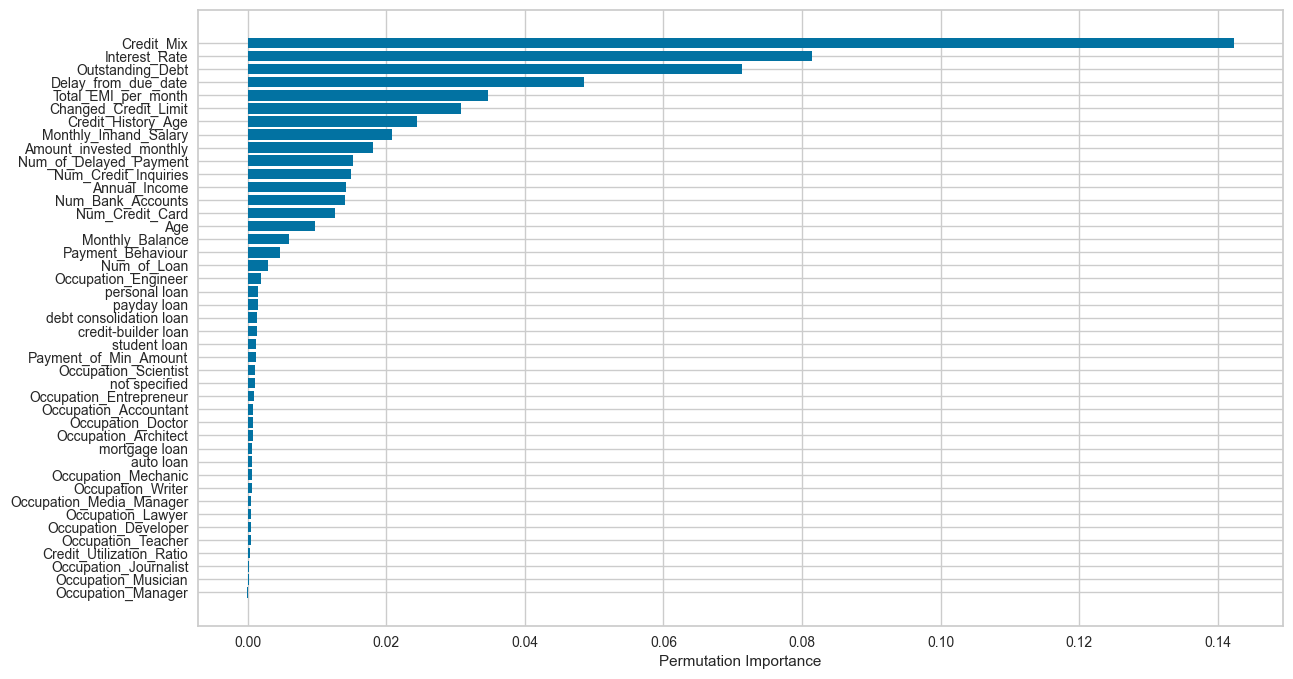

In [410]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(14,8))
plt.barh(X_val.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance");

# Final Model

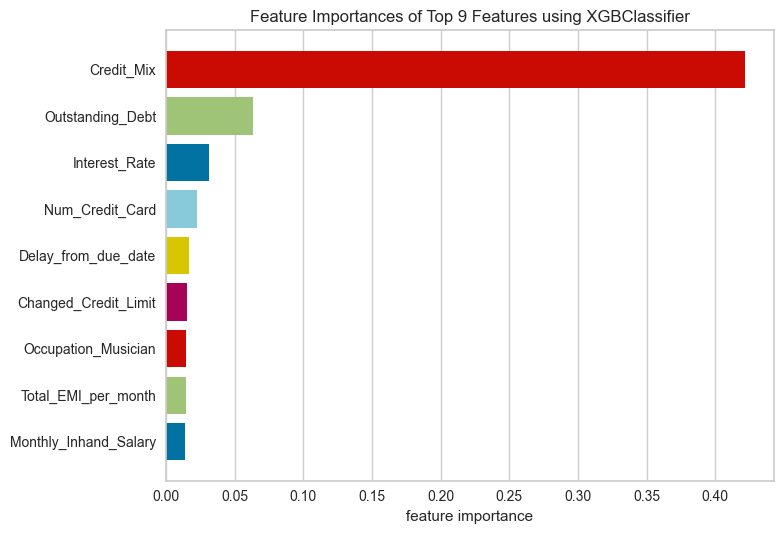

['Monthly_Inhand_Salary' 'Total_EMI_per_month' 'Occupation_Musician'
 'Changed_Credit_Limit' 'Delay_from_due_date' 'Num_Credit_Card'
 'Interest_Rate' 'Outstanding_Debt' 'Credit_Mix']


In [447]:
model = XGBClassifier(
    random_state=42, 
    **best_params_xgb
)
# seect top 8 features
viz = feature_importances(model, X_val, y_val, relative=False, topn=9)

# get top  features
print(viz.features_)

In [448]:
# we selected 9 features for final model
df_final = df_train[viz.features_.tolist() + ['Credit_Score']]
df_final

,Monthly_Inhand_Salary,Total_EMI_per_month,Occupation_Musician,Changed_Credit_Limit,Delay_from_due_date,Num_Credit_Card,Interest_Rate,Outstanding_Debt,Credit_Mix,Credit_Score
ID,,,,,,,,,,
84094,5564.016667,0.138485,False,9.97,0.967742,7.0,20.0,0.445905,0.0,Poor
46702,1258.132500,0.014044,False,16.34,0.322581,9.0,31.0,0.445262,0.0,Poor
147514,707.692500,0.000000,False,0.96,0.387097,4.0,17.0,0.246853,1.0,Good
16675,7022.135000,0.031282,False,1.45,0.225806,4.0,3.0,0.042859,2.0,Standard
84080,10508.076667,0.156040,False,1.54,0.129032,6.0,12.0,0.215121,1.0,Standard
...,...,...,...,...,...,...,...,...,...,...
100440,6098.886667,0.081631,False,9.61,0.354839,6.0,3.0,0.020735,1.0,Standard
97738,2208.935000,0.036241,False,0.77,0.774194,8.0,25.0,0.350133,0.0,Poor
32228,1395.779583,0.011121,False,8.98,0.403226,3.0,5.0,0.013078,1.0,Standard


In [449]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 84094 to 29219
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Monthly_Inhand_Salary  70000 non-null  float64
 1   Total_EMI_per_month    70000 non-null  float64
 2   Occupation_Musician    70000 non-null  bool   
 3   Changed_Credit_Limit   70000 non-null  float64
 4   Delay_from_due_date    70000 non-null  float64
 5   Num_Credit_Card        70000 non-null  float64
 6   Interest_Rate          70000 non-null  float64
 7   Outstanding_Debt       70000 non-null  float64
 8   Credit_Mix             70000 non-null  float64
 9   Credit_Score           70000 non-null  object 
dtypes: bool(1), float64(8), object(1)
memory usage: 5.4+ MB


In [450]:
X = df_final.drop(columns='Credit_Score')
y = df_final['Credit_Score']

In [451]:
le = LabelEncoder()
y  = le.fit_transform(y)

In [452]:
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y)
sample_weight

array([1.14384692, 1.14384692, 1.86353593, ..., 0.62927005, 0.62927005,
       1.14384692])

In [434]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

/Users/zhengwan/opt/anaconda3/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [453]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model001 = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

In [454]:
model001.fit(X, y, 
    sample_weight=sample_weight
)

/Users/zhengwan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   n_jobs=-1)

In [416]:
final_model = XGBClassifier(
    random_state=42, 
    **best_params_xgb
)

In [419]:
%%time
final_model.fit(X, y, 
    sample_weight=sample_weight
)

CPU times: user 10 s, sys: 1.03 s, total: 11 s
Wall time: 1.88 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [455]:
X_test = X_test[df_final.columns[:-1]].copy()

X_test.shape

(30000, 9)

In [456]:
#Good:2, Standard:1, Poor:0
y_test_pred = model001.predict(X_test)


In [457]:
y_test_pred

array([2, 0, 1, ..., 2, 1, 1])

In [458]:
def generate_submission():
    list_of_predictions = model001.predict(X_test)
    preds = label_encoder.inverse_transform(list_of_predictions)
    df = pd.DataFrame({'Credit_Score': preds}, index=X_test.index)
    df.to_csv('sandbox_submission_demo.csv')
    print(df['Credit_Score'].value_counts())
    

In [459]:
generate_submission()

Credit_Score
Standard    13186
Poor         9988
Good         6826
Name: count, dtype: int64
